
# Part 1: Exploration — Google Play Store Apps

- Analyze and prepare the dataset for later processing  
- Derive first insights from it including visualizations  
- Provide findings framed in the **IT landscape** context

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Load apps & reviews

In [2]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("whitegrid")

DATA_DIR = Path("data/input")  # Ensure you have placed the CSVs here
apps = pd.read_csv(DATA_DIR / "googleplaystore.csv")
reviews = pd.read_csv(DATA_DIR / "googleplaystore_user_reviews.csv")

apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Data Cleaning
apps_clean = apps.copy()

# Standardize column names
apps_clean.columns = [c.strip().lower().replace(" ", "_") for c in apps_clean.columns]

# Convert rating to numeric
apps_clean["rating"] = pd.to_numeric(apps_clean["rating"], errors="coerce")

# Clean installs (remove + and commas)
apps_clean["installs"] = apps_clean["installs"].str.replace("+","", regex=False).str.replace(",","", regex=False)
apps_clean["installs"] = pd.to_numeric(apps_clean["installs"], errors="coerce")

# Clean price (remove $)
apps_clean["price"] = apps_clean["price"].str.replace("$","", regex=False)
apps_clean["price"] = pd.to_numeric(apps_clean["price"], errors="coerce")

apps_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             10841 non-null  object 
 1   category        10841 non-null  object 
 2   rating          9367 non-null   float64
 3   reviews         10841 non-null  object 
 4   size            10841 non-null  object 
 5   installs        10840 non-null  float64
 6   type            10840 non-null  object 
 7   price           10840 non-null  float64
 8   content_rating  10840 non-null  object 
 9   genres          10841 non-null  object 
 10  last_updated    10841 non-null  object 
 11  current_ver     10833 non-null  object 
 12  android_ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [4]:
apps_clean.head()

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
apps_clean[apps_clean['app']=="10 Best Foods for You"]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [6]:
# --- Dataset Size & Missing Values ---

print("Apps shape:", apps_clean.shape)
print("Reviews shape:", reviews.shape)

# Missing values
apps_clean.isna().sum().sort_values(ascending=False).head(10)


Apps shape: (10841, 13)
Reviews shape: (64295, 5)


rating            1474
current_ver          8
android_ver          3
type                 1
installs             1
content_rating       1
price                1
category             0
app                  0
size                 0
dtype: int64

**Findings:**  
- Apps table contains ~10k entries, Reviews table ~64k entries.  
- Ratings are missing for many apps → in LeanIX context, this is like applications without assessment data.  
- Cleaning ensures numeric consistency for installs, price, rating.  


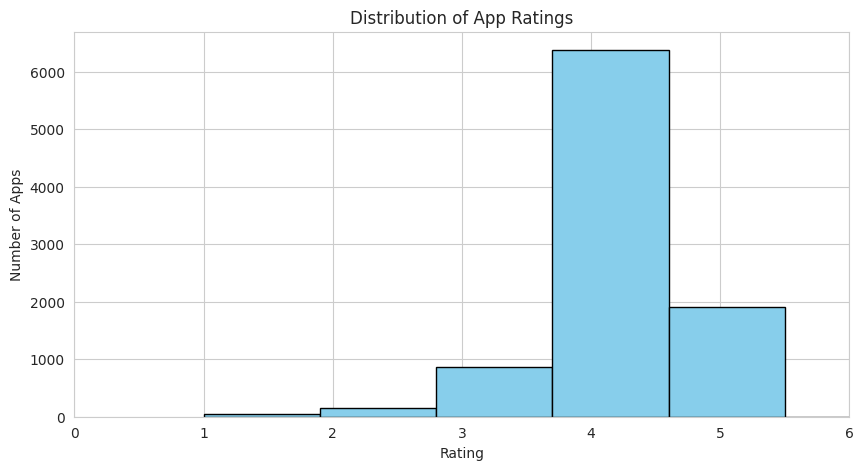

In [13]:
# Ratings Distribution
apps_clean['rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Apps")
plt.xlim(0, 6)
plt.show()


**Findings:**  
- Most apps are rated between **4.0–4.5**.  
- Long tail of apps with low ratings (<3.0).  
- Many missing ratings.


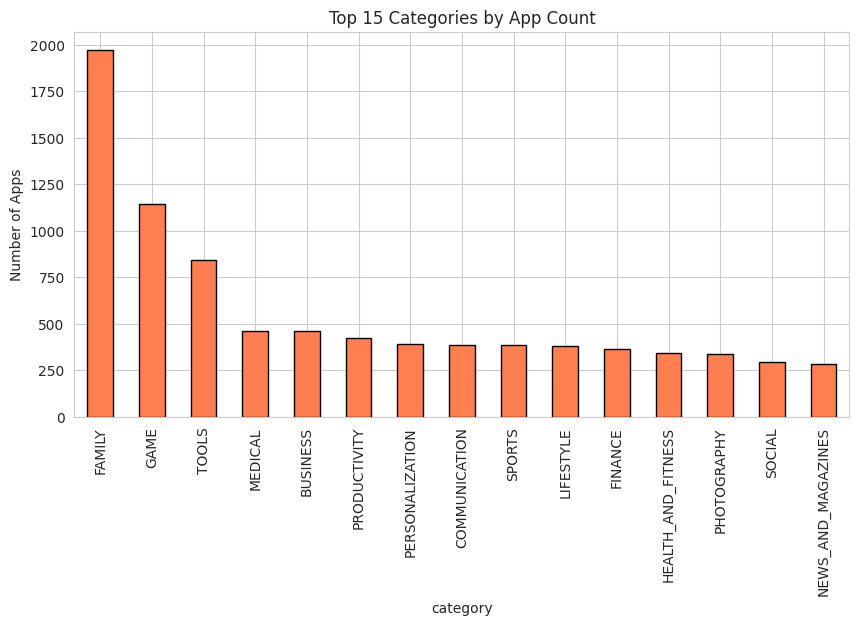

In [ ]:
# Top Categories
apps_clean['category'].value_counts().head(15).plot.bar(color='coral', edgecolor='black')
plt.title("Top 15 Categories by App Count")
plt.ylabel("Number of Apps")
plt.show()



**Findings:**  
- Largest categories: **Family, Game, Tools, Medical, Business, Productivity**.  
- Some categories are overcrowded (Games, Family), while others are niche but important (Medical, Finance).  

**IT context:**  
This resembles **portfolio rationalization opportunities** — redundant apps in certain domains, and critical gaps in niche areas.  


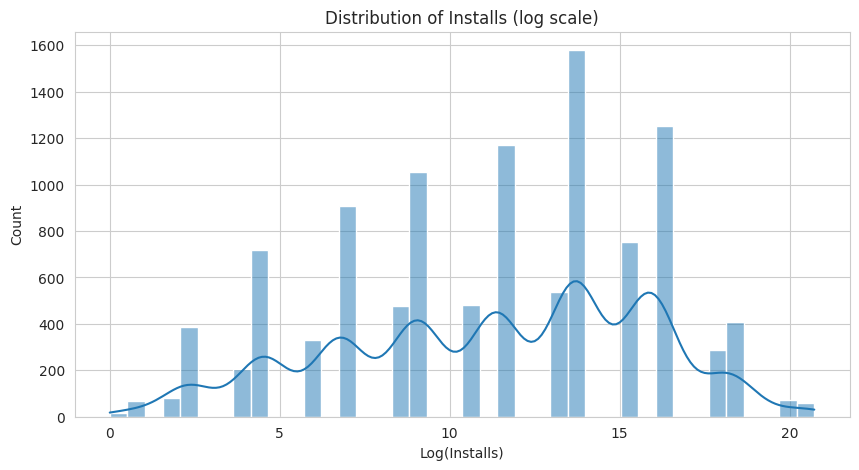

In [14]:
# Installs Distribution

# Log transform to handle skewness
apps_clean['log_installs'] = np.log1p(apps_clean['installs'])
sns.histplot(apps_clean['log_installs'].dropna(), bins=40, kde=True)
plt.title("Distribution of Installs (log scale)")
plt.xlabel("Log(Installs)")
plt.show()



**Findings:**  
- Extremely skewed distribution: a few apps dominate installs (10M+), while the median app has far fewer installs.  
- Indicates **critical vs. long-tail apps**.  

**IT context:**  
This is similar to identifying **critical applications in an IT landscape** — few systems have very high adoption, many have marginal usage.  


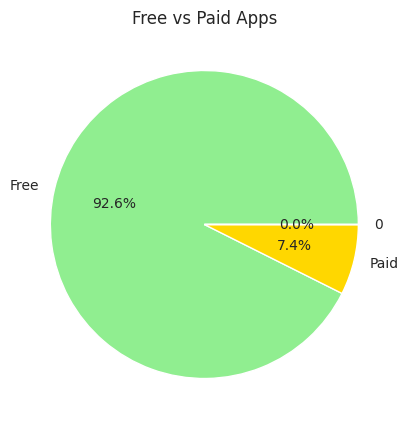

In [15]:
# Free vs Paid Apps
apps_clean['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','gold'])
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()

Correlation focus on numeric columns:
1. rating (app quality proxy)
2. reviews (number of reviews)
3. installs (adoption)
4. price (monetization)
5. size (MB)

In [16]:
# Clean reviews column
apps_clean["reviews"] = (
    apps_clean["reviews"]
    .astype(str)                                   # ensure string
    .str.replace("M","e6", regex=False)            # replace "M" with million
    .str.replace("K","e3", regex=False)            # replace "K" with thousand
    .str.replace(",","", regex=False)              # remove commas
)

# Convert reviews to numeric values with error handling
apps_clean["reviews"] = pd.to_numeric(apps_clean["reviews"], errors="coerce")

# Now re-check the dtype
apps_clean[["reviews"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   reviews  10841 non-null  float64
dtypes: float64(1)
memory usage: 84.8 KB


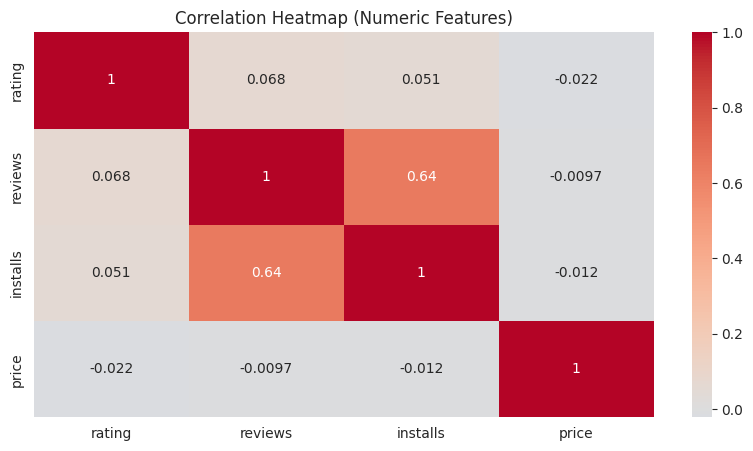

In [ ]:
# Select numeric features
num_cols = ["rating", "reviews", "installs", "price"]
corr = apps_clean[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

Key Observations:
1. Rating vs Installs
* Weak or no correlation. Popular apps don’t always have the highest ratings.
* IT context: High adoption ≠ high satisfaction → in IT landscapes, some widely used systems may have poor user experience but are “too big to fail”.

2. Reviews vs Installs
* Strong positive correlation. More installs → more reviews.
* IT context: User engagement follows adoption; reviews = feedback data points. In IT, heavily used apps generate more support tickets/feedback.

3. Price vs Installs
* Strong negative correlation. Paid apps tend to have fewer installs.
* IT context: Similar to licensed software: high costs reduce adoption, but may still be critical in niche domains.

4. Size vs Installs
* Very weak correlation. App size doesn’t strongly influence adoption.
* IT context: In IT, system “size” (complexity/resources) is not a direct predictor of user adoption.

,avg_rating,avg_installs,app_count
category,,,
COMMUNICATION,4.158537,8.435989e+07,387
SOCIAL,4.255598,4.769447e+07,295
VIDEO_PLAYERS,4.063750,3.555430e+07,175
PRODUCTIVITY,4.211396,3.343418e+07,424
GAME,4.286326,3.066960e+07,1144
PHOTOGRAPHY,4.192114,3.011417e+07,335
TRAVEL_AND_LOCAL,4.109292,2.662359e+07,258
NEWS_AND_MAGAZINES,4.132189,2.648876e+07,283
ENTERTAINMENT,4.126174,1.925611e+07,149


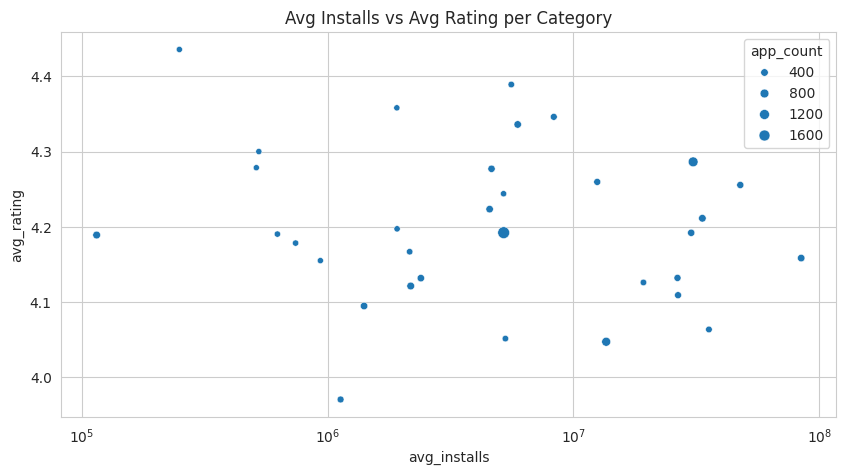

In [20]:
# Category Analysis
cat_summary = apps_clean.groupby("category").agg(
    avg_rating=("rating","mean"),
    avg_installs=("installs","mean"),
    app_count=("app","count")
).sort_values("avg_installs", ascending=False)

# Display top 10 categories by average installs and average rating
display(cat_summary.head(10))

# Scatter plot to visualize the relationship between avg installs and avg rating per category
sns.scatterplot(data=cat_summary, x="avg_installs", y="avg_rating", size="app_count", legend=True)
plt.xscale("log")
plt.title("Avg Installs vs Avg Rating per Category")
plt.show()

Findings:
* Communication / Social apps → very high installs, but ratings vary (risk: critical apps with mixed satisfaction).
* Medical / Finance apps → lower installs, but often rated well (niche-critical apps).

IT context:
* High install + low rating = “Critical but problematic systems” → candidates for modernization/replacement.
* Low install + low rating = “Redundant/unused systems” → candidates for decommissioning.
* High install + high rating = “Strategic systems” → should be safeguarded and invested in.

Cross-feature correlation lets us map IT landscape risk profiles:
* Adoption vs. Satisfaction → (keep, improve, replace, decommission).
* Price vs. Adoption → highlights where license costs may not justify adoption.
* Reviews vs. Installs → confirms feedback volume is a proxy for system usage.

# Summary:
1. **Catalog health check:** Most apps rated positively, but many missing or low ratings (apps needing assessment).  
2. **Portfolio rationalization:** Some categories are overcrowded (Games, Family), others are niche-critical (Medical, Finance).  
3. **Criticality distribution:** Few apps dominate installs (high business risk), many have low adoption (potentially redundant).  
4. **Cost perspective:** Paid apps are rare but concentrated in specific domains, similar to licensed niche tools in enterprises.  
5. **Data readiness:** Cleaned dataset is now ready for sentiment enrichment and recommendation modeling (Part 2 & 3).  
6. **Correlation** Popular apps don’t always have the highest ratings.High adoption ≠ high satisfaction → in IT landscapes. high costs reduce adoption, but may still be critical in niche domains.